In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
df_water = pd.read_csv('water_potability.csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Data Cleaning

In [7]:
print('NaN values in Water dataset:')
df_water.isna().sum()

NaN values in Water dataset:


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df_clean = df_water.fillna(df_water.mean())

In [10]:
print('Sum of Null values after cleaning = ', df_clean.isnull().sum().sum())

Sum of Null values after cleaning =  0


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: >

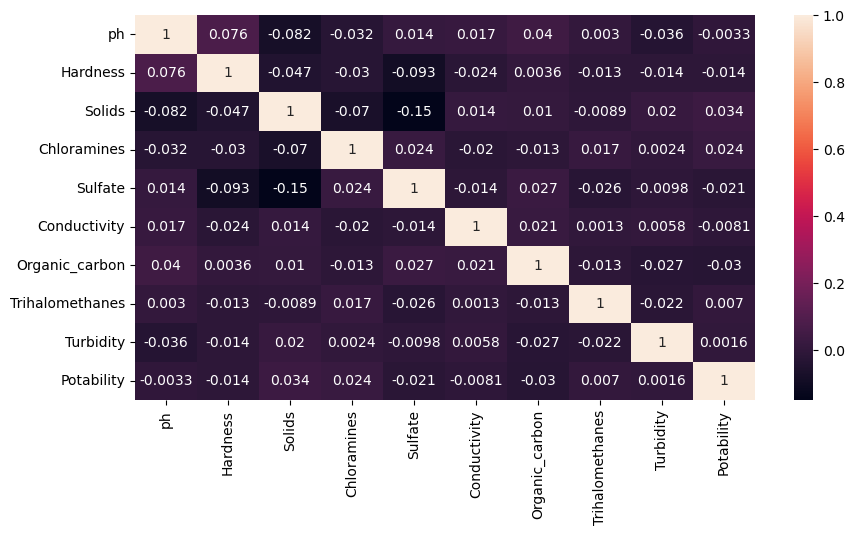

In [12]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_clean.corr(), annot = True)

In [13]:
x = df_clean[list(df_clean.columns)[0: -1]]

In [14]:
y = df_clean['Potability']

In [15]:
# Feature selection
## determing correlation metrics (0 mean no correlation, (+) means positive relation and (-) mean inverse relation whereas strong or weak also matters on the feature selection)

df_clean.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


### Data Balancing

In [147]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Create an imbalanced dataset
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.5, 0.5],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print("Original class distribution:", Counter(y))

# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print("Oversampled class distribution:", Counter(y_over))


# Undersampling using RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print("Undersampled class distribution:", Counter(y_under))

Original class distribution: Counter({1: 500, 0: 500})
Oversampled class distribution: Counter({1: 500, 0: 500})
Undersampled class distribution: Counter({0: 500, 1: 500})


### Data Spliting

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 2620
Testing set size: 656


In [153]:
## Check the distribution of target variable in both sets

print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution in testing set:")
print(y_test.value_counts(normalize=True))


Target distribution in training set:
Potability
0    0.609924
1    0.390076
Name: proportion, dtype: float64

Target distribution in testing set:
Potability
0    0.609756
1    0.390244
Name: proportion, dtype: float64


### Model Building

In [154]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

### Model Evaluation

In [158]:
y_pred = model.predict(X_test)

In [170]:
#checking accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")



Model Accuracy: 0.6098


In [162]:
y_train.value_counts()

Potability
0    1598
1    1022
Name: count, dtype: int64

In [171]:
#confusion matrics

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[400   0]
 [256   0]]


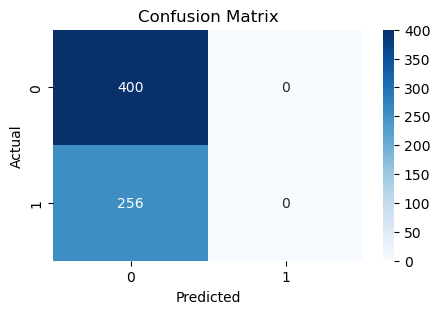

In [166]:
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [167]:
# Feature Importance - Included feature importance analysis to understand which factors most influence water potability
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
           Feature  Importance
3      Chloramines    0.018148
0               ph    0.012041
2           Solids    0.000005
7  Trihalomethanes   -0.000070
5     Conductivity   -0.000099
1         Hardness   -0.000642
4          Sulfate   -0.001182
6   Organic_carbon   -0.009193
8        Turbidity   -0.010556


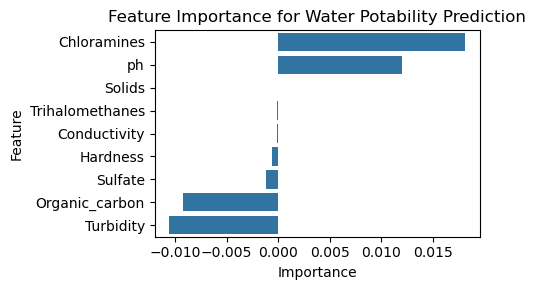

In [169]:
# Plot feature importance
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Water Potability Prediction')
plt.tight_layout()
plt.show()